## Blue print

1. Check data shape and type.
2. Convert chracteristic values to numbers.
3. Split training dataset to *ourtrain* and *ourtest*.
4. Dimensionality reduction.
5. Try various models(logistic regression, decision tree, random forest, SVM, KNN, Naive Bayes).
6. Apply to the test dataset.


## 1. Data Investigation

In [1]:
# Import packages
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
train.head()

(900000, 33)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


* id(int64): 0, 1, 2, ..., 899999 (ordered)
* f_00(float64): -4.59 ~ 4.74
* f_01(float64): -4.68 ~ 4.81
* f_02(float64): -4.64 ~ 4.96 
* f_03(float64): -4.65 ~ 4.45
* f_04(float64): -4.74 ~ 4.94
* f_05(float64): -4.75 ~ 4.97
* f_06(float64): -4.84 ~ 4.82
* f_07(int64): 0, 1, 2, ..., 15 (not ordered)
* f_08(int64): 0, 1, 2, ..., 16 (not ordered)
* f_09(int64): 0, 1, 2, ..., 14 (not ordered)
* f_10(int64): 0, 1, 2, ..., 14 (not ordered)
* f_11(int64): 0, 1, 2, ..., 13 (not ordered)
* f_12(int64): 0, 1, 2, ..., 16 (not ordered)
* f_13(int64): 0, 1, 2, ..., 12 (not ordered)
* f_14(int64): 0, 1, 2, ..., 14 (not ordered)
* f_15(int64): 0, 1, 2, ..., 14 (not ordered)
* f_16(int64): 0, 1, 2, ..., 15 (not ordered)
* f_17(int64): 0, 1, 2, ..., 14 (not ordered)
* f_18(int64): 0, 1, 2, ..., 13 (not ordered)
* f_19(float64): -11.28 ~ 12.07
* f_20(float64): -11.25 ~ 11.47
* f_21(float64): -13.31 ~ 14.45
* f_22(float64): -11.85 ~ 11.34
* f_23(float64): -12.30 ~ 12.24
* f_24(float64): -11.41 ~ 12.38
* f_25(float64): -11.91 ~ 12.52
* f_26(float64): -14.30 ~ 12.91
* f_27(object): 'AAAAAAABAB', ..., 'BMBDEADPAC' (-> 10 digits)
* f_28(float64): -1229.75 ~ 1229.56
* f_29(int64): 0, 1
* f_30(int64): 0, 1, 2
* target(int64): 0, 1

In [4]:
print(test.shape)
test.head()

(700000, 32)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


#### - Correlation

In [5]:
cor = round(train.corr(), 2)
# cor[((cor > 0.4) | (cor < -0.4)) & (cor != 1)].count()  # no correlation was found

## 2. Numerize *f_27* column

In [6]:
# Return 'n'th character
def nth_char(column, n):
    count = 1
    nth = []
    for characters in column:
        for char in characters:
            if count == n:
                nth.append(char)
                count = 1
                break
            else:
                count += 1

    return nth

In [7]:
# Split the letters
f_27_01 = np.array(nth_char(train.f_27, 1))
f_27_02 = np.array(nth_char(train.f_27, 2))
f_27_03 = np.array(nth_char(train.f_27, 3))
f_27_04 = np.array(nth_char(train.f_27, 4))
f_27_05 = np.array(nth_char(train.f_27, 5))
f_27_06 = np.array(nth_char(train.f_27, 6))
f_27_07 = np.array(nth_char(train.f_27, 7))
f_27_08 = np.array(nth_char(train.f_27, 8))
f_27_09 = np.array(nth_char(train.f_27, 9))
f_27_10 = np.array(nth_char(train.f_27, 10))

In [8]:
# Create DataFrame
dff_27 = pd.DataFrame({"f_27_01":f_27_01, "f_27_02":f_27_02, "f_27_03":f_27_03, "f_27_04":f_27_04, 
                "f_27_05":f_27_05, "f_27_06":f_27_06, "f_27_07":f_27_07, "f_27_08":f_27_08, 
                "f_27_09":f_27_09, "f_27_10":f_27_10})

In [9]:
print(dff_27.shape)
dff_27.head()

(900000, 10)


,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,A,B,A,B,D,A,D,B,A,B
1,A,C,A,C,C,A,D,C,E,B
2,A,A,A,E,A,B,C,K,A,D
3,B,D,B,B,A,A,C,B,C,B
4,B,D,B,C,B,B,C,H,F,E


In [10]:
# Data Investigate
print("f_27_01: ", dff_27.f_27_01.unique())
print("f_27_02: ", dff_27.f_27_02.unique())
print("f_27_03: ", dff_27.f_27_03.unique())
print("f_27_04: ", dff_27.f_27_04.unique())
print("f_27_05: ", dff_27.f_27_05.unique())
print("f_27_06: ", dff_27.f_27_06.unique())
print("f_27_07: ", dff_27.f_27_07.unique())
print("f_27_08: ", dff_27.f_27_08.unique())
print("f_27_09: ", dff_27.f_27_09.unique())
print("f_27_10: ", dff_27.f_27_10.unique())

f_27_01:  ['A' 'B']
f_27_02:  ['B' 'C' 'A' 'D' 'E' 'G' 'F' 'H' 'I' 'J' 'K' 'L' 'M' 'N']
f_27_03:  ['A' 'B']
f_27_04:  ['B' 'C' 'E' 'D' 'H' 'I' 'G' 'A' 'F' 'J' 'K' 'L' 'M' 'N' 'O']
f_27_05:  ['D' 'C' 'A' 'B' 'F' 'E' 'G' 'I' 'H' 'J' 'K' 'L' 'M' 'O']
f_27_06:  ['A' 'B']
f_27_07:  ['D' 'C' 'A' 'E' 'B' 'G' 'H' 'F' 'I' 'J' 'M' 'K' 'L' 'N' 'O']
f_27_08:  ['B' 'C' 'K' 'H' 'E' 'P' 'D' 'A' 'S' 'T' 'J' 'Q' 'N' 'R' 'G' 'M' 'F' 'O'
 'I' 'L']
f_27_09:  ['A' 'E' 'C' 'F' 'D' 'H' 'B' 'G' 'I' 'J' 'L' 'K' 'M' 'N' 'O']
f_27_10:  ['B' 'D' 'E' 'A' 'C' 'K' 'F' 'G' 'H' 'J' 'I' 'L' 'M' 'N' 'O']


In [11]:
# Numerize the split dataframe
def to_num(df):
    ref = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "H":8, "I":9, "J":10, "K":11, "L":12, 
    "M":13, "N":14, "O":15, "P":16, "Q":17, "R":18, "S":19, "T":20, "U":21, "V":22, "W":23, "X":24,
    "Y":25, "Z":26}

    df = ref[df]
    return df

dff_27 = dff_27.applymap(to_num) 
dff_27.head()

,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,1,2,1,2,4,1,4,2,1,2
1,1,3,1,3,3,1,4,3,5,2
2,1,1,1,5,1,2,3,11,1,4
3,2,4,2,2,1,1,3,2,3,2
4,2,4,2,3,2,2,3,8,6,5


In [12]:
# Combine with training dataset
train = pd.concat([train,dff_27], axis=1)
train = train.drop(columns=['f_27'])
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,1,2,1,2,4,1,4,2,1,2
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,1,3,1,3,3,1,4,3,5,2
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,1,1,1,5,1,2,3,11,1,4
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,2,4,2,2,1,1,3,2,3,2
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,2,4,2,3,2,2,3,8,6,5


## 3. Dimensionality Reduction (PCA)

### 3-1. Mean Centering

In [13]:
# Drop the target
attributes = train.drop(columns=["target"])
centered = attributes - attributes.mean()
# print(centered.var())
centered.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,-449999.5,-1.372960,0.237722,-0.244550,0.568773,-0.647144,0.839042,0.113842,-1.03146,2.942002,...,-0.498659,-0.96586,-0.669067,-0.989288,1.61347,-0.467658,0.622226,-8.370528,-2.022963,-1.283644
1,-449998.5,1.697307,-1.711488,-2.231507,-0.544292,1.113743,-1.552459,0.448535,-1.03146,0.942002,...,-0.498659,0.03414,-0.669067,0.010712,0.61347,-0.467658,0.622226,-7.370528,1.977037,-1.283644
2,-449997.5,1.682012,0.615580,-1.028863,0.811860,-0.608516,0.113681,-0.707950,-1.03146,-2.057998,...,-0.498659,-1.96586,-0.669067,2.010712,-1.38653,0.532342,-0.377774,0.629472,-2.022963,0.716356
3,-449996.5,-0.117886,-0.589000,-0.805812,2.088191,0.371576,-0.129115,-0.281866,0.96854,-0.057998,...,0.501341,1.03414,0.330933,-0.989288,-1.38653,-0.467658,-0.377774,-8.370528,-0.022963,-1.283644
4,-449995.5,1.148768,-0.177732,-0.666046,-1.099975,0.468446,0.499833,0.408225,0.96854,0.942002,...,0.501341,1.03414,0.330933,0.010712,-0.38653,0.532342,-0.377774,-2.370528,2.977037,1.716356


### 3-2. Eigenvalues and Eigenvectors

In [14]:
# Covariance Matrix
cov = np.dot(centered.T, centered)/(len(centered)-1)
df_cov = pd.DataFrame(cov)
df_cov.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,6.750008e+10,-69.726726,150.003925,21.941770,243.591428,223.281404,390.837030,378.880258,-204.562825,47.865164,...,-20.695100,639.900351,-1.421589,402.580045,352.565477,-33.888080,-189.433170,-1055.555357,9.849346,381.134551
1,-6.972673e+01,0.997777,-0.000302,0.001897,-0.000840,-0.000544,0.000305,-0.001310,0.001375,-0.004057,...,0.000117,-0.001025,-0.000338,-0.001212,0.001880,-0.000716,0.000074,-0.010234,-0.000213,-0.001983
2,1.500039e+02,-0.000302,0.998386,0.000500,-0.000832,-0.000832,0.000635,-0.000440,-0.002020,-0.000464,...,-0.001160,-0.003868,0.000119,0.002744,-0.001886,-0.000187,0.000941,-0.010720,-0.000631,-0.000137
3,2.194177e+01,0.001897,0.000500,1.001029,0.000792,0.000067,-0.001110,0.000894,0.001998,0.000540,...,0.000041,0.000502,0.000630,-0.001807,-0.000905,-0.000434,-0.000616,0.002255,0.000450,0.001098
4,2.435914e+02,-0.000840,-0.000832,0.000792,1.000350,0.001049,0.002769,-0.001092,0.001845,-0.000197,...,-0.000723,-0.001333,0.000566,-0.001610,-0.000703,-0.000035,0.000426,0.000955,-0.001344,-0.001226


In [15]:
# Eigenvalues & Eigenvectors
eig = np.linalg.eig(cov)
print('<eigenvalues>\n', eig[0],'\n')
print('<eigenvectors>\n', eig[1])

<eigenvalues>
 [6.75000750e+10 5.70126909e+04 3.29793628e+01 8.65015374e+00
 6.75518486e+00 6.46940509e+00 5.91615750e+00 5.47368044e+00
 4.89572920e+00 4.51139303e+00 4.24383617e+00 4.03472203e+00
 3.60826716e+00 1.53608750e-01 1.70986771e-01 2.41741209e-01
 2.07797355e-01 5.48830096e-01 6.31912548e-01 3.24386660e+00
 2.94040107e+00 1.53115837e+00 2.71034318e+00 2.62462859e+00
 2.56164670e+00 1.75792918e+00 1.93087483e+00 1.95068332e+00
 2.32096581e+00 2.29452282e+00 2.23339203e+00 2.19819899e+00
 2.15491375e+00 2.09576606e+00 2.11107105e+00 9.95136644e-01
 1.00282939e+00 1.00076618e+00 1.00059194e+00 9.97891524e-01
 9.98926132e-01] 

<eigenvectors>
 [[-1.00000000e+00  1.92308766e-06  1.68277951e-08 ...  3.33206739e-09
   2.39657019e-10  3.41045639e-10]
 [ 1.03298610e-09 -7.92221023e-04 -3.16257139e-04 ...  3.28551847e-01
   6.54916519e-01 -1.25688416e-01]
 [-2.22227922e-09 -8.11583639e-04 -3.28041833e-04 ...  3.44107300e-01
  -5.30630328e-01 -6.10364202e-01]
 ...
 [ 1.56378398e-08  1

### 3-3. Contribution in the Data

In [16]:
def percent_variation(n):
    '''Percent Variation of top 'n' factors'''
    trace = sum(eig[0])    # sum of all eigenvalues
    contribution = [i/trace for i in eig[0]]
    return contribution[:n]    # return the first n number of contributions

n = 1
print(percent_variation(n))
print('Total contribution of 1 components:', sum(percent_variation(n))*100, '%\n')

m = 2
print(percent_variation(m))
print('Total contribution of 2 components:', sum(percent_variation(m))*100, '%')

[0.9999991534114326]
Total contribution of 1 components: 99.99991534114326 %

[0.9999991534114326, 8.446308041146556e-07]
Total contribution of 2 components: 99.99999980422368 %


### 3-4.  Fit to PCA (getting a projection matrix)

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(attributes)

# How much each of the features influence the PC
k = pd.DataFrame(pca.components_, columns=list(attributes.columns))
k

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,1.0,-1.032986e-09,2.222279e-09,3.250643e-10,3.608760e-09,3.307870e-09,5.790174e-09,5.613036e-09,-3.030557e-09,7.091128e-10,...,-3.065937e-10,9.479995e-09,-2.106056e-11,5.964142e-09,5.223186e-09,-5.020451e-10,-2.806414e-09,-1.563784e-08,1.459161e-10,5.646431e-09


### 3-5. Projection (transforming the original data via projection matrix)

In [18]:
data_pca = pca.transform(attributes)
data_pca_df = pd.DataFrame(data_pca, columns = ['PC1'])
data_pca_df.head()

,PC1
0,-449999.499868
1,-449998.499273
2,-449997.500375
3,-449996.499593
4,-449995.500416


### cf) Choosing the number of components

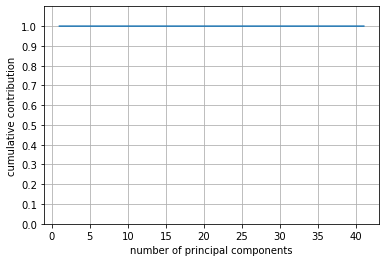

In [19]:
pca = PCA().fit(attributes)

x = np.arange(1,42)
y = np.cumsum(pca.explained_variance_ratio_)

fig3 = plt.figure(figsize = (6, 4))
plt.plot(x, y)
plt.xlabel('number of principal components', fontsize=10)
plt.ylabel('cumulative contribution', fontsize=10)

plt.ylim(0, 1.1)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid()
plt.show()

## 4. Split training dataset into *ourtrain* and *ourtest*

In [23]:
# Check if a Stratified Sampling should be used
train["target"].value_counts()

0    462161
1    437839
Name: target, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

ourtrain, ourtest = train_test_split(train, test_size=0.3)
print(ourtrain.shape, ourtest.shape)
ourtrain.head()

(630000, 42) (270000, 42)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
94774,94774,-0.142955,0.998779,0.338305,1.091507,-1.636606,-1.957741,0.107597,2,3,...,2,3,1,2,4,1,4,7,2,2
57476,57476,0.513663,-0.233822,0.418408,-0.304559,-0.453802,1.450914,1.113922,0,4,...,1,4,2,2,2,2,3,7,5,1
437832,437832,-0.970042,-1.680995,0.421482,0.480354,-0.190683,0.635815,-0.112825,1,2,...,2,2,2,2,2,2,4,13,2,6
609728,609728,-0.558220,-0.883866,1.999973,-1.359405,-0.948404,0.431423,-1.216660,1,2,...,1,1,2,3,2,1,4,15,2,3
634047,634047,-1.230923,-0.701474,-0.115596,-1.270750,-0.583876,-1.743249,0.651963,2,1,...,2,4,1,4,2,2,5,6,1,2


5. Try various models(logistic regression, decision tree, random forest, SVM, KNN, Naive Bayes).
6. Apply to the test dataset.